https://thecode.media/analitika-dannyh-na-praktike-dc-protiv-marvel/

* **Pandas**. Библиотека для работы с большими данными, представленными в виде таблиц. С помощью неё мы прочитаем данные и выберем только те, которые понадобятся для построения наглядных диаграмм.Моделируем игру в рулетку на Python

* **Matplotlib**. Технология для построения наглядных графиков. Это большая библиотека, и чтобы не перегружать программу, мы используем оттуда только часть — модуль упрощённого интерфейса `matplotlib.pyplot`.

* **Plotly**. Это ещё одна библиотека для создания интерактивных графиков, и от неё нам тоже нужен один отдельный модуль интерфейса — `plotly.express`.

👉 С этими модулями мы сможем строить графики быстро и с меньшим количеством кода, чем при использовании основной библиотеки.

* **Warnings**. Встроенная библиотека, которая отключает все предупреждения, чтобы они не засоряли вывод в консоли. Это полезно, если вы знаете, что код работает как надо.

In [2]:
pip install kagglehub


   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/marvel-vs-dc")

print("Path to dataset files:", path)

100%|██████████| 107k/107k [00:00<00:00, 171kB/s]

Extracting files...
Path to dataset files: C:\Users\invno833324\.cache\kagglehub\datasets\willianoliveiragibin\marvel-vs-dc\versions\1


In [4]:
# загружаем все библиотеки для работы
# с данными и построения графиков
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

# отключаем предупреждения в консоли
warnings.filterwarnings('ignore')

#### Настраиваем датасет и фильтруем от лишних значений
Сначала немного оптимизируем вывод данных в консоли. Настроим ширину таблицы и максимальное количество строк:

In [5]:
# устанавливаем параметры изображения
# показываем все столбцы
pd.set_option('display.max_columns', None)
# задаём ширину таблицы в 1 000 пикселей
pd.set_option('display.width', 1000)
# ограничиваем вывод первыми 15 строками
pd.set_option('display.max_rows', 10)

In [6]:
# указываем путь к нашему файлу
file_path = 'Marvel Vs DC NEW.csv'
# считываем данные
df = pd.read_csv(file_path)

In [7]:
df.head()

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0


#### Классифицируем фильмы по производителю
Настроим фильтр, чтобы отобрать из датасета только те фильмы, которые точно относятся к вселенным Marvel и DC. Для этого создадим два списка и в оба запишем имена и названия ключевых героев и серий комиксов:

In [8]:
# задаём ключевые слова для поиска фильмов Marvel
marvel_keywords = [
   "Avengers", "Black Panther", "Captain America", "Doctor Strange", "Eternals",
   "Falcon", "Guardians of the Galaxy", "Hawkeye", "Hulk", "Iron Man", "Loki",
   "Scarlet Witch", "Shang-Chi", "Spider-Man", "Thor", "WandaVision", "Ant-Man",
   "Black Widow", "Captain Marvel", "Deadpool", "X-Men", "Wolverine", "Fantastic Four",
   "Ms. Marvel", "Moon Knight", "She-Hulk", "Daredevil", "Punisher", "Jessica Jones",
   "Luke Cage", "Iron Fist", "Inhumans", "What If...?", "Mutant X", "Secret Invasion", "Blade", "Agents of S.H.I.E.L.D.",
   "Fantastic 4"
]

# задаём ключевые слова для поиска фильмов DC
dc_keywords = [
   "Batman", "Superman", "Wonder Woman", "Aquaman", "Flash", "Green Lantern",
   "Joker", "Shazam", "Justice League", "Suicide Squad", "Harley Quinn", "Batwoman",
   "Arrow", "Supergirl", "Doom Patrol", "Titans", "Black Adam", "Peacemaker",
   "Constantine", "Swamp Thing", "Watchmen", "Green Arrow", "Blue Beetle",
   "Hawkman", "Zatanna", "Catwoman", "Cyborg", "Teen Titans", "Darkseid", "Smallvile"
]

Чтобы воспользоваться этими списками для фильтрации, создадим функцию. Она будет проверять заголовки фильмов на вхождение в них ключевых слов. Если в заголовке есть слово из списка marvel_keywords, маркируем его как фильм Marvel. Аналогично поступаем с DC. Если в заголовке нет совпадений ни с одним списком, помечаем такой фильм как Unknown:

In [9]:
# создаём функцию классификации
def classify_movie(title):
   # проверяем, есть ли в заголовке ключевые слова фильмов Marvel
   for keyword in marvel_keywords:
       # если такие есть, маркируем фильм как Marvel
       if keyword in title:
           return 'Marvel'
   # проверяем, есть ли в заголовке ключевые слова фильмов DC
   for keyword in dc_keywords:
       # если такие есть, маркируем фильм как DC
       if keyword in title:
           return 'DC'
   # если в названии нет таких слов, возвращаем значение Unknown
   return 'Unknown'

Функция возвращает строку DC, Marvel или Unknown. В нашем датасете мы создадим дополнительный столбец для каждого фильма и будем записывать туда результат работы.

Применяем функцию к датасету и выводим в консоль то, что получилось:



In [10]:
# применяем функцию к столбцу с названием Movie
# и создаём новый столбец Franchise
df['Franchise'] = df['Movie'].apply(classify_movie)

# выводим на экран в консоли первые 10 фильмов
print('\nВыводим датасет после классификации по франшизам')
print(df.head(10))


Выводим датасет после классификации по франшизам
   ID                              Movie      Year                     Genre  RunTime                                        Description  IMDB_Score Franchise
0   0                           Eternals     -2021    Action,Adventure,Drama        0  The saga of the Eternals, a race of immortal b...         0.0    Marvel
1   1                               Loki  (2021– )  Action,Adventure,Fantasy        0      A new Marvel chapter with Loki at its center.         0.0    Marvel
2   2  The Falcon and the Winter Soldier     -2021    Action,Adventure,Drama   50 min  Following the events of 'Avengers: Endgame,' S...         7.5    Marvel
3   3                        WandaVision     -2021       Action,Comedy,Drama  350 min  Blends the style of classic sitcoms with the M...         8.1    Marvel
4   4            Spider-Man: No Way Home     -2021   Action,Adventure,Sci-Fi        0       A continuation of Spider-Man: Far From Home.         0.0    Mar

Столбец с описанием мы использовать в сегодняшнем исследовании не будем, поэтому его можно убрать. Фильмы Unknown нам тоже пока не нужны, но совсем избавляться от них мы не будем: создадим переменную `unknown_franchise` и сохраним их туда как отдельный датасет.



In [12]:
# удаляем столбец с описанием фильмов
df = df.drop(columns=['Description'])

# создаём отдельный датафрейм для фильмов с отметкой Unknown
unknown_franchise = df[df['Franchise'] == 'Unknown']

# выводим первые 5 фильмов для проверки
print('\nВыводим датасет с фильмами без франшиз')
print(unknown_franchise.head())


Выводим датасет с фильмами без франшиз
    ID                      Movie   Year                       Genre  RunTime  IMDB_Score Franchise
24  24                 Brightburn  -2019        Drama,Horror,Mystery   90 min         6.1   Unknown
38  38                The Marvels  -2022    Action,Adventure,Fantasy        0         0.0   Unknown
40  40                  Long Shot  -2019              Comedy,Romance  125 min         6.8   Unknown
41  41  Ralph Breaks the Internet  -2018  Animation,Adventure,Comedy  112 min         7.0   Unknown
50  50                  Ironheart    NaN      Action,Adventure,Drama        0         0.0   Unknown


Ещё в датасете остались фильмы с нулевым рейтингом. Для аналитики они нам не помогут, поэтому убираем их. Фильмы с неопознанной франшизой мы сохранили, поэтому из основного датасета эти строки тоже можно удалить:



In [13]:
# фильтруем данные: оставляем только те строки, где рейтинг IMDb не равен 0
df = df[df['IMDB_Score'] != 0]

# фильтруем данные: удаляем все, где столбец Franchise = Unknown
df = df[df['Franchise'] != 'Unknown']

# выводим первые 5 фильмов для проверки
print('\nВыводим датасет после фильтрации от нулевого рейтинга и неизвестной франшизы')
print(df.head())


Выводим датасет после фильтрации от нулевого рейтинга и неизвестной франшизы
   ID                              Movie   Year                    Genre  RunTime  IMDB_Score Franchise
2   2  The Falcon and the Winter Soldier  -2021   Action,Adventure,Drama   50 min         7.5    Marvel
3   3                        WandaVision  -2021      Action,Comedy,Drama  350 min         8.1    Marvel
6   6                  Avengers: Endgame  -2019   Action,Adventure,Drama  181 min         8.4    Marvel
7   7            Guardians of the Galaxy  -2014  Action,Adventure,Comedy  121 min         8.0    Marvel
9   9          Spider-Man: Far from Home  -2019  Action,Adventure,Sci-Fi  129 min         7.5    Marvel


Для начала ещё немного почистим данные и проверим, нет ли дублирующихся строк с фильмами. Для этого используем встроенные методы библиотеки pandas:

* drop_duplicates() удаляет повторяющиеся строки;
* value_counts() подсчитывает количество фильмов у каждой франшизы.

In [14]:
# строим график 1: уникальные фильмы
# удаляем дублирующиеся фильмы из датасета
# и сохраняем результат в переменной df_unique
df_unique = df.drop_duplicates(subset='Movie')

# используя метод value_counts(), подсчитываем
# количество уникальных фильмов для обеих франшиз
franchise_counts = df_unique['Franchise'].value_counts()

У нас всё готово к построению графика. Для этого используем библиотеку matplolib и указываем размер, тип диаграммы и названия всех полей:



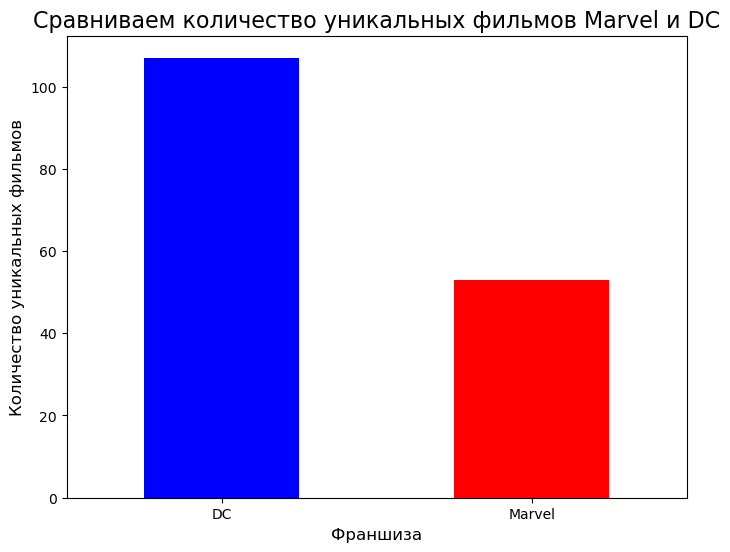

In [15]:
# указываем в дюймах размер будущего графика
plt.figure(figsize=(8, 6))

# строим столбчатую диаграмму kind='bar'
franchise_counts.plot(kind='bar', color=['blue', 'red'])

# устанавливаем заголовок и размер шрифта для заголовка
plt.title('Сравниваем количество уникальных фильмов Marvel и DC', fontsize=16)

# устанавливаем называния для осей и размер шрифта
plt.xlabel('Франшиза', fontsize=12)
plt.ylabel('Количество уникальных фильмов', fontsize=12)

# устанавливаем поворот названия для оси X в ноль градусов
plt.xticks(rotation=0)

# отрисовываем график
plt.show()

Видно, что у DC фильмов больше почти в два раза. При этом обе компании примерно ровесники: DC появилась в 1934 году, а Marvel — в 1939-м.



#### Средний рейтинг фильмов
Посмотрим, насколько хорошо картины каждой студии принимают зрители.В датасете уже есть рейтинг из базы IMDb, и мы заранее удалили все позиции с нулевым рейтингом. Отсортируем фильмы по франшизе методом `groupby()` и подсчитаем средний рейтинг методом `mean()`. Результат сохраним в отдельной переменной `average_ratings`:



In [17]:
# строим график 2: средний рейтинг фильмов
# группируем фильмы по франшизам и вычисляем средний рейтинг
average_ratings = df_unique.groupby('Franchise')['IMDB_Score'].mean()
average_ratings

Franchise
DC        6.946729
Marvel    7.130189
Name: IMDB_Score, dtype: float64

Построим такой же столбчатый график и зададим для него настройки отображения. Размер немного изменим, потому что иначе подписи внизу не поместятся:



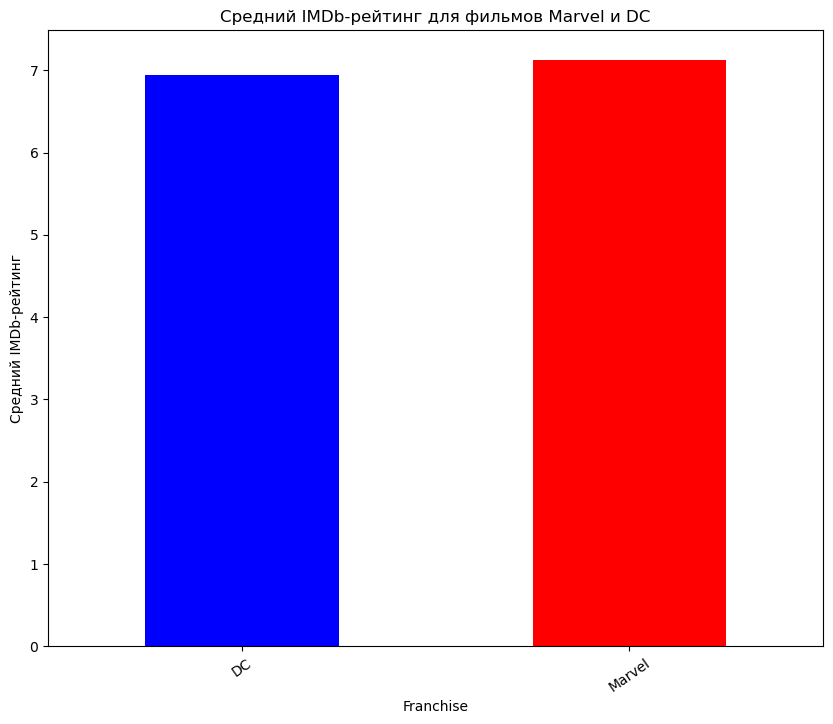

In [18]:
# строим столбчатую диаграмму kind='bar'
average_ratings.plot(kind='bar', color=['blue', 'red'], figsize=(10, 8))

# устанавливаем подпись для всего графика
plt.title('Средний IMDb-рейтинг для фильмов Marvel и DC')

# устанавливаем подпись для оси Y
plt.ylabel('Средний IMDb-рейтинг')

# устанавливаем поворот меток на оси X в 35 градусов для лучшей читаемости
plt.xticks(rotation=35)

# отрисовываем график
plt.show()

#### Как часто и сколько фильмов снимают
Проверим, сколько картин выходило в разные годы у каждой студии. Для этого понадобится длинная команда с использованием нескольких методов:

In [20]:
# строим график 3: количество фильмов Marvel и DC по годам
# подсчитываем количество фильмов для каждой комбинации год-франшиза
movies_per_year = df_unique.groupby(['Year', 'Franchise']).size().unstack().fillna(0)
movies_per_year

Franchise,DC,Marvel
Year,,
(1952–1958),1.0,0.0
(1980 TV Movie),1.0,0.0
(1982 TV Movie),1.0,0.0
(1984 TV Movie),1.0,0.0
(1985 TV Movie),1.0,0.0
...,...,...
-2017,0.0,3.0
-2018,2.0,3.0
-2019,2.0,3.0


Как это работает:

* df_unique.groupby — наш обработанный датасет, из которого мы берём значения сразу по двум категориям: год и франшиза. В итоге все фильмы, выпущенные в определённый год и относящиеся к Marvel или DC, будут собраны по группам.
* .size() возвращает количество элементов в каждой группе.
* .unstack() расставляет значения, интерпретируя их как столбцы и строки. Во время запуска у нас будут точки на графике, которые соединятся в линейную диаграмму.
* .fillna(0) заменяет все значение NaN на 0.

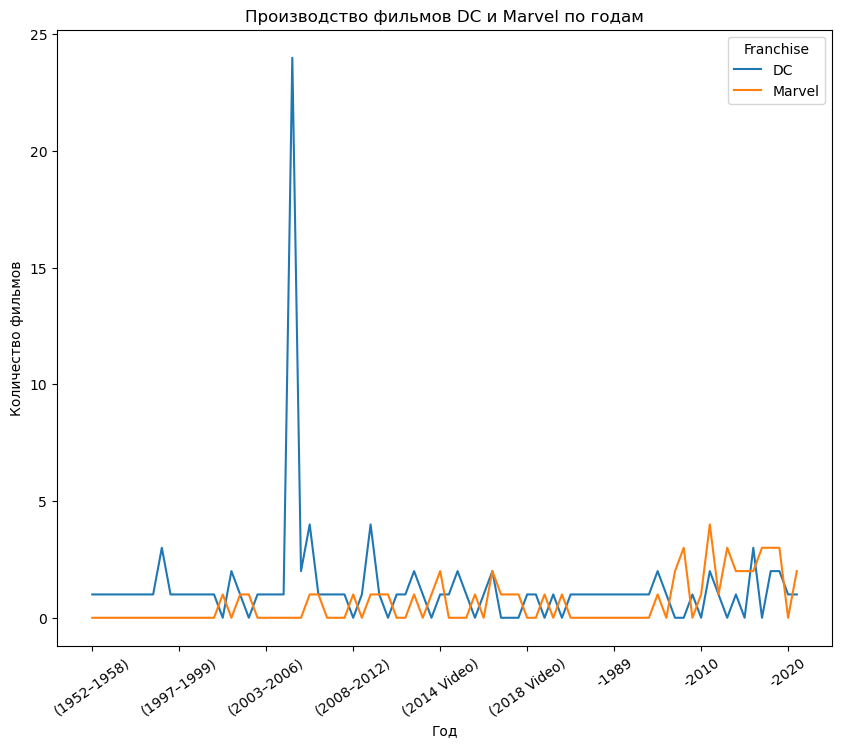

In [21]:
# строим линейный график: по оси X идут годы, по Y — количество фильмов
movies_per_year.plot(kind='line', figsize=(10, 8))

# устанавливаем название графика
plt.title('Производство фильмов DC и Marvel по годам')

# устанавливаем название оси X
plt.xlabel('Год')

# устанавливаем название оси Y
plt.ylabel('Количество фильмов')

# устанавливаем поворот меток на оси X в 35 градусов для лучшей читаемости
plt.xticks(rotation=35)

# отрисовываем график
plt.show()

Видно, что, по нашим данным, DC сняли много фильмов за короткий период с 2006 по 2008 год. Поэтому и первый график показал, что у DC почти в два раза больше фильмов.

Но это не значит, что это правда. Нужно проверить фильмы за этот период в датасете и посмотреть базы, чтобы убедиться, что наша информация соответствует действительности.

#### Фильмы с рейтингом от 8 и выше
Следующие графики компьютер построит в браузере. Это потому, что для них будет использоваться библиотека plotly, которая строит интерактивные графики и рендерит их в формате HTML. В остальном логика такая же, как с предыдущими графиками.

Сначала фильтруем данные по рейтингу IMDb, чтобы отобрать только те, у которых рейтинг не ниже 8:

In [22]:
# строим график 4: фильмы с высоким рейтингом IMDb
# фильтруем данные: оставляем только фильмы с рейтингом от 8.0 и выше
top_movies = df_unique[df_unique['IMDB_Score'] >= 8.0]
top_movies

,ID,Movie,Year,Genre,RunTime,IMDB_Score,Franchise
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,8.1,Marvel
6,6,Avengers: Endgame,-2019,"Action,Adventure,Drama",181 min,8.4,Marvel
7,7,Guardians of the Galaxy,-2014,"Action,Adventure,Comedy",121 min,8.0,Marvel
11,11,Avengers: Infinity War,-2018,"Action,Adventure,Sci-Fi",149 min,8.4,Marvel
22,22,The Avengers,-2012,"Action,Adventure,Sci-Fi",143 min,8.0,Marvel
...,...,...,...,...,...,...,...
454,454,Batman: Arkham Asylum,(2009 Video Game),"Action,Adventure,Crime",0,9.2,DC
477,477,Batman: The Telltale Series,(2016 Video Game),"Action,Crime,Sci-Fi",0,8.1,DC
559,559,Justice League: Alien Invasion,-2012,"Short,Adventure,Sci-Fi",12 min,8.1,DC
1265,1265,Beware the Batman,(2013–2014),"Animation,Action,Adventure",20 min,8.1,DC


После этого устанавливаем настройки отображения:

* используем отфильтрованный датафрейм для работы;
* задаём значения по осям X и Y;
* выбираем разный цвет в зависимости от франшизы;
* устанавливаем информацию, которая будет выходить на экран при наведении на пункты графика.

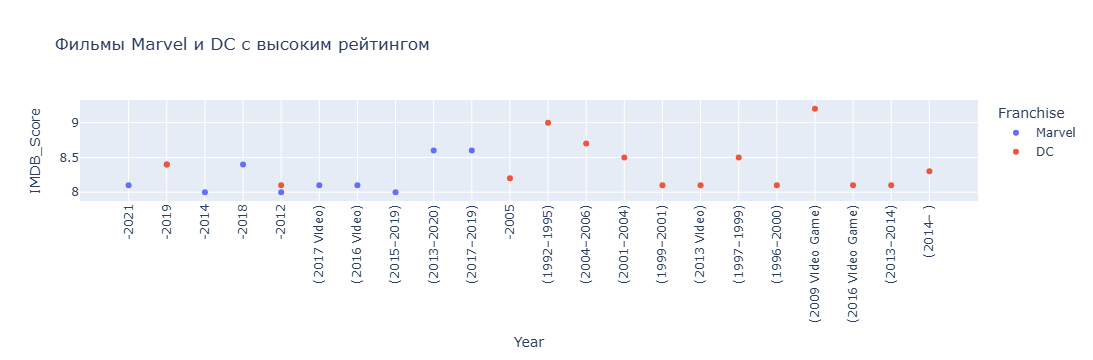

In [23]:
# создаём диаграмму scatter plot с использованием библиотеки Plotly Express
fig = px.scatter(
   # используем отфильтрованный фрагмент датасета
   top_movies,
   # устанавливаем значение оси X из датасета
   x='Year',
   # устанавливаем значение оси Y из датасета
   y='IMDB_Score',
   # устанавливаем зависимость цвета точек от франшизы
   color='Franchise',
   # при наведении на точку выводим название фильма
   hover_data=['Movie'],
   # устанавливаем название графика
   title='Фильмы Marvel и DC c высоким рейтингом'
)
# поворачиваем название меток по X на 270 градусов для удобства
fig.update_xaxes(tickangle=270)
# отрисовываем график
fig.show()

По этому графику нельзя сказать явно, что одна из компаний лидирует по фильмам с высоким рейтингом. Но можно дополнить это исследование: занести все такие картины в другой датафрейм и посмотреть, на какие фильмы лучше реагировали зрители.



#### Жанры
Попробуем посмотреть, в каких жанрах чаще снимают и есть ли корреляция между жанром и рейтингом IMDb.

Для этого разобьём колонку с жанрами на отдельные строки и для каждого жанра создадим свой экземпляр фильма. Так мы сможем зафиксировать все появления жанров, если у одного фильма больше одного жанра.

In [24]:
# строим график 5: график по жанрам
# преобразуем значения в столбце Genre в список жанров для каждого фильма
df_unique['Genres_List'] = df_unique['Genre'].str.split(',')
# функция explode() создаёт дубликаты фильма для каждого жанра
df_exploded = df_unique.explode('Genres_List')

На всякий случай почистим данные, если вместо жанра стоит пробел или символ пустой строки:



In [25]:
# функция dropna удаляет строки с пустыми жанрами — NaN
df_exploded_clean = df_exploded.dropna(subset=['Genres_List'])
# удаляем методом .strip() строки, где на месте жанра стоят пробелы или пустые строки
df_exploded_clean = df_exploded_clean[df_exploded_clean['Genres_List'].str.strip() != '']

После этого берём подготовленный датасет и строим диаграмму. Нам понадобится задать структуру графика, информацию для отображения при наведении и цветовую схему:



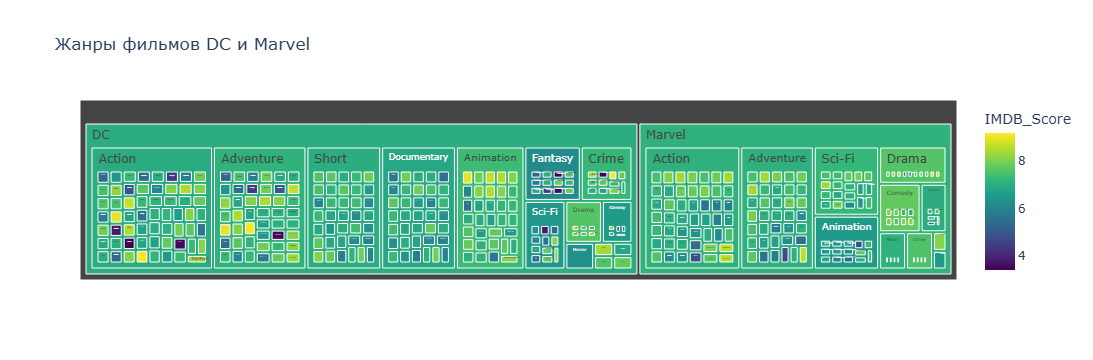

In [26]:
# создаём диаграмму treemap с использованием библиотеки Plotly Express
fig = px.treemap(
   # используем отфильтрованный фрагмент датасета
   df_exploded_clean,
   # создаём вложенную структуру: франшиза → жанр → фильм
   path=['Franchise', 'Genres_List', 'Movie'],
   # задаём название графика
   title='Жанры фильмов DC и Marvel',
   # при наведении на ячейку отображаем рейтинг
   hover_data=['IMDB_Score'],
   # цвет ячейки зависит от рейтинга IMDb
   color='IMDB_Score',
   # устанавливем цветовую тему Viridis
   color_continuous_scale='Viridis'
)
# отрисовываем график
fig.show()

По графику можно быстро найти фильмы с невысоким рейтингом. Но эти данные тоже можно дополнить — например, внести визуальное разделение по франшизам или жанрам.



#### Зависимость длительности и рейтинга
Попробуем проверить, есть ли связь между продолжительностью и рейтингом.

Для этого применим регулярное выражение и достанем числа, которые находятся в ячейках с длительностью фильмов. После этого переведём это число в формат float, чтобы его можно было использовать в графике:

In [27]:
# строим график 6: IMDb-рейтинг / длительность фильма
# извлекаем количество минут и переводим значение в тип float
df_unique['RunTime_Min'] = df_unique['RunTime'].str.extract('(\d+)').astype(float)

Полученный датафрейм передаём в модуль для построения графиков и устанавливаем настройки внешнего вида:



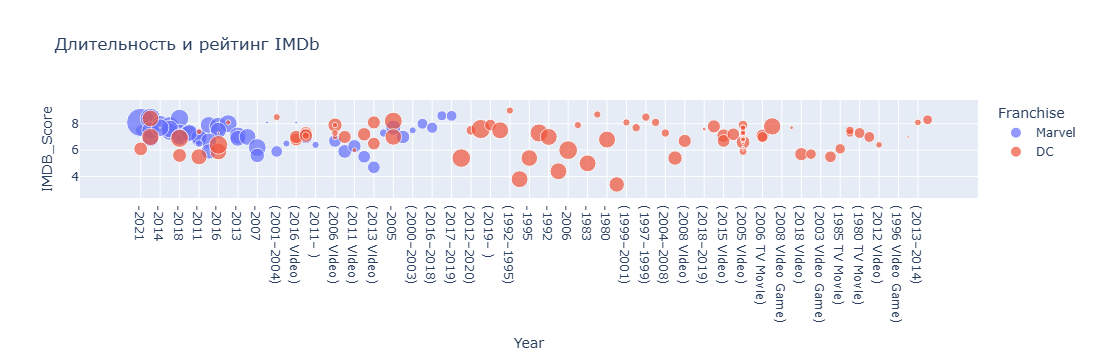

In [28]:
# создаём диаграмму scatter plot с использованием библиотеки Plotly Express
fig = px.scatter(
   # используем отфильтрованный фрагмент датасета
   df_unique,
   # устанавливаем значение оси X из датасета
   x='Year',
   # устанавливаем значение оси Y из датасета
   y='IMDB_Score',
   # размер обозначающей фильм точки зависит от продолжительности фильма
   size='RunTime_Min',
   # цвет зависит от франшизы
   color='Franchise',
   # при наведении отображаем название фильма
   hover_name='Movie',
   # устанавливаем заголовок графика
   title='Длительность и рейтинг IMDb'
)
# отрисовываем график
fig.show()

Зависимости между минутами и рейтингом не видно, но это лишь одна из гипотез. Можно тщательнее изучить этот график и перестроить его с учётом каких-то новых предположений.



Что ещё можно сделать с этим датасетом
Самое сложное в аналитике данных — понять конечную цель исследования и выстроить правильную гипотезу. Сейчас у нас есть красивые графики, но уже по ним видно, что можно продолжить отфильтровывать данные и искать новые параметры для изучения.

Ещё можно добавить новые параметры и поискать взаимосвязи:

* зависит ли рейтинг от того, выходил ли перед этим новый фильм у другой студии;
* влияет ли перерыв между выходами фильмов на их рейтинг;
* а что будет, если учесть все фильмы, а не только с высоким рейтингом (исключая те, данных по рейтингу к которым нет).